# Introducción a Numpy

```Omar Abel Rodríguez López, Instituto de Física, UNAM```

Email: ```oarodriguez.mx@gmail.com```

```Noviembre 22, 2017```

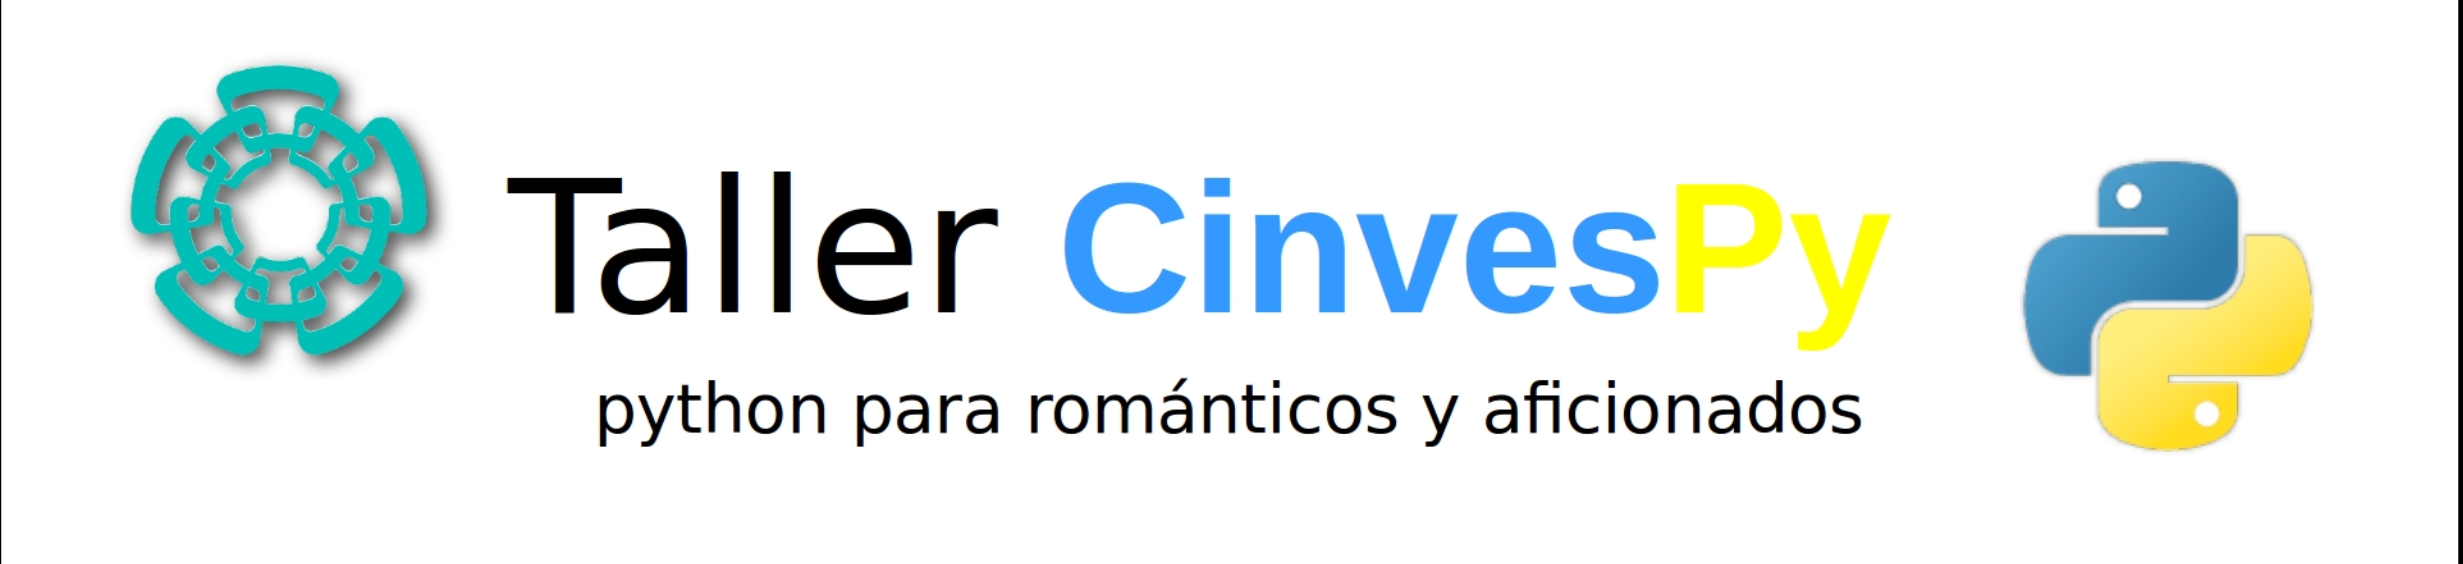

In [1]:
from IPython.display import Image
Image(filename='./img/cinvespy-logo.png')

----

## ¿Qué es Numpy?

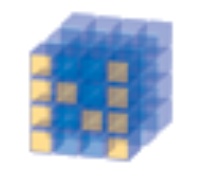

In [2]:
Image(filename='./img/numpy-logo.png', width=150)

* Numpy es la biblioteca basica para hacer cómputo científico en Python.

* Fue iniciado en 2005/2006 por Travis Oliphant (uno de los creadores de la distribución Anaconda)

* Forma parte del proyecto Scipy (el cuál veremos en la siguiente plática)

## ¿Qué cosas nuevas ofrece Numpy?

* Define un tipo de objeto, el ``array`` n-dimensional, para hacer cálculos científicos de alto rendimiento.

* Define una gran cantidad de rutinas para realizar operaciones matemáticas, estadísticas y de algebrá linear sobre ejemplares tipo``array``.

* Tiene un núcleo escrito en los lenguaje C y/o Fortran, ofreciendo un gran desempeño respecto a código escrito en Python puro.

## ¿Cómo empezar a usarla?

Desde una libreta de Jupyter es tan simple como

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Ésto importa las principales rutinas de la biblioteca al espacio global (``global namespace``) de la libreta.

Por otra parte, desde un módulo `my_module.py` lo tenemos que importar

In [4]:
import numpy as np

-----

## El array n-dimensional

* Es un objeto homogéneo, generalmente usado para almacenar números del mismo tipo

* Es un tipo de dato indizable, como las tuplas o las listas:

In [5]:
x_array = arange(0, 100)
x_array[19]
# x_array

19

* Es un tipo de dato iterable, se puede usar en la construcción ``for ... in ...``:

In [6]:
x_total = 0
for value in x_array:
    x_total += value

    # Print the total
x_total

4950

* Su tipo exacto es ``numpy.ndarray``, tal como lo reporta la función ``type``:

In [7]:
type(x_array)

numpy.ndarray

* A diferencia de las listas, una vez creado un ``ndarray`` su tamaño no puede ser cambiado

* Alterar un ``ndarray`` implica crear un nuevo array con espacio suficiente para almacenar la nueva información.

-----

## Atributos de un ``ndarray``

### ``ndarray.shape``

Es una tupla de números enteros. Indica la dimensión del array --que es longitud de la tupla-- así como el número de elementos en cada dimension.

In [8]:
x = array([[1, 2], [3, 4]])
x.shape  # array de dos dimensión

(2, 2)

* Cada elemento del ``shape`` hace referencia a un eje (``axis``) del ``ndarray`` de acuerdo a su índice: los ejes son ``0, 1, 2, ...``.

* Un ``ndarray`` de una dimensión se pueden visualizar como un vector; uno de dos dimensiones como una matriz; uno de tres dimensiones como una matriz cuyos elementos son vectores, y así.

### ``ndarray.size``

Es un entero. Indica el número de elementos que contiene el array.

In [9]:
x = array([[1, 2, 2], [3, 4, 3]])
x.size

6

Equivale al producto de los elementos en cada dimensión del array

In [10]:
assert x.size == prod(x.shape)

### ``ndarray.dtype``

Indica cual es el tipo de dato de la información almacenada en el array.

In [10]:
x.dtype

dtype('int32')

Este atributo comunmente tiene un equivalente a los tipos del lenguaje C como ``int``, ``long``, ``float``, ``double``, etc. Tipos de datos más complejos son posibles, como ``Python objects``.

----

## Rutinas para crear ``array``

Podemos crear nuevos arrays a partir de listas y tuplas, así como usando rutinas específicas. También podemos especificar el tipo de dato del ``array``. Las más comunes son:

### ``array(obj)``

Acepta un objeto ``obj``, tal como un número, una lista o una tupla, y en general un iterable, y devuelve un ejemplar ``ndarray``.

In [11]:
x = array([[1, 2], [3, 4]], dtype=int32)
x

array([[1, 2],
       [3, 4]])

### ``arange(start, stop, step_size)``

Crea un ``array`` con sucesión de datos que van desde ``start`` hasta ``stop`` en pasos de tamaño ``step_size``

In [13]:
x = arange(0, 5, 0.5)
x

array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5])

El array es forma un conjunto semi-abierto, ya que no contiene a ``stop``.

### ``linspace(start, stop, num)``

Crea un ``array`` con sucesión de ``num`` datos que van desde ``start`` hasta ``stop``. El resultado es un conjunto cerrado que contiene tanto a ``start`` y ``stop``.

In [14]:
x = linspace(0, 5, 21)
x

array([ 0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ,
        2.25,  2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,  4.  ,  4.25,
        4.5 ,  4.75,  5.  ])

Se puede omitir el último elemento ``stop`` especificando el argumento ``endpoint=False``,

In [13]:
linspace(0, 5, 20, endpoint=False)

array([ 0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ,
        2.25,  2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,  4.  ,  4.25,
        4.5 ,  4.75])

### ``logspace(start, stop, num)``

Crea un ``array`` con sucesión de ``num`` datos que van desde ``10**start`` hasta ``10**stop`` en escala logarítmica. 

In [16]:
x = logspace(0, 1, 21)
x

array([  1.        ,   1.12201845,   1.25892541,   1.41253754,
         1.58489319,   1.77827941,   1.99526231,   2.23872114,
         2.51188643,   2.81838293,   3.16227766,   3.54813389,
         3.98107171,   4.46683592,   5.01187234,   5.62341325,
         6.30957344,   7.07945784,   7.94328235,   8.91250938,  10.        ])

Se puede omitir el último elemento ``stop`` especificando el argumento ``endpoint=False``. También se puede especificar la base,

In [16]:
logspace(0, 1, 20, base=2)

array([ 1.        ,  1.03715504,  1.07569059,  1.11565792,  1.15711024,
        1.20010272,  1.24469259,  1.2909392 ,  1.3389041 ,  1.38865114,
        1.44024654,  1.49375896,  1.54925964,  1.60682245,  1.66652401,
        1.72844379,  1.79266419,  1.85927071,  1.928352  ,  2.        ])

### ``mgrid[slice1, slice2, ...]``

Crea un **meshgrid** n-dimensional según el número de ``slices`` usados:

Usando un solo ``slice``, obtenemos un ``ndarray`` equivalente al obtenido al llamar la
función ``arange``

In [18]:
x = mgrid[-1:1:0.25]
x

array([-1.  , -0.75, -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75])

Usando dos ``slice`` obtenemos dos matrices coordenadas (``array`` de dos dimensiones) que recorren los valores de cada ``slice`` de manera complementaria.

In [19]:
x, y = mgrid[0:2:0.5, -2:0:0.5]

In [20]:
x   # Los valores cambian sobre el axis=0

array([[ 0. ,  0. ,  0. ,  0. ],
       [ 0.5,  0.5,  0.5,  0.5],
       [ 1. ,  1. ,  1. ,  1. ],
       [ 1.5,  1.5,  1.5,  1.5]])

In [21]:
y    # Los valores cambian sobre el axis=1

array([[-2. , -1.5, -1. , -0.5],
       [-2. , -1.5, -1. , -0.5],
       [-2. , -1.5, -1. , -0.5],
       [-2. , -1.5, -1. , -0.5]])

### ``zeros(shape)``, ``ones(shape)``

Crea un ``ndarray`` n-dimensional con las dimensiones indicadas por shape, cuyas entradas son inicialmente ceros o unos.

In [23]:
shp = (2, 2, 3)
zeros(shp)

array([[[ 0.,  0.,  0.],
        [ 0.,  0.,  0.]],

       [[ 0.,  0.,  0.],
        [ 0.,  0.,  0.]]])

In [20]:
ones(shp)

array([[[ 1.,  1.,  1.]],

       [[ 1.,  1.,  1.]]])

### ``zeros_like(array)``, ``ones_like(array)``

Crea un ``ndarray`` n-dimensional con los mismos atributos que ``array``, cuyas entradas son inicialmente ceros o unos, respectivamente.

In [24]:
x = mgrid[0:1.:1, 0:10:1]
ones_like(x)

array([[[ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.]],

       [[ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.]]])

In [25]:
zeros_like(x)

array([[[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]],

       [[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]]])

-----

## Rutinas para manipular ``ndarray``

Con Numpy podemos manipular un ``ndarray`` de muchas maneras, desde cambiar sus dimensiones hasta dividirlos y unirlos.

Los elementos de un array se pueden modificar mediante su índice, como las listas:

In [24]:
x = linspace(1, 15, 15)
x

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.])

In [30]:
x[0:5] = -11.1   # Mediante un slice
x[5] = '3.14159'   # Índice específico
x

array([-11.1    , -11.1    , -11.1    , -11.1    , -11.1    ,   3.14159,
         7.     ,   8.     ,   9.     ,  10.     ,  11.     ,  12.     ,
        13.     ,  14.     ,  15.     ])

Para manipular arreglos con más dimensiones se debe indicar los índices para cada dimensión:

In [28]:
x = linspace(1, 15, 15).reshape((3, 5))   # Ver siguiente sección para entender la sintaxis de reshape
x

array([[  1.,   2.,   3.,   4.,   5.],
       [  6.,   7.,   8.,   9.,  10.],
       [ 11.,  12.,  13.,  14.,  15.]])

In [29]:
x[0, 4] = -99
x[2, 0] = 88

In [30]:
x

array([[  1.,   2.,   3.,   4., -99.],
       [  6.,   7.,   8.,   9.,  10.],
       [ 88.,  12.,  13.,  14.,  15.]])

### ``reshape(array, new_shape)``

Cambia las dimensiones de ``array`` a las dadas por ``new_shape``, sin crear un nuevo ``ndarray`` en lo posible.

In [32]:
x = linspace(1, 15, 15)
x

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.])

In [37]:
new_shape = (3, 5)
reshape(x, new_shape)

array([[  1.,   2.,   3.,   4.,   5.],
       [  6.,   7.,   8.,   9.,  10.],
       [ 11.,  12.,  13.,  14.,  15.]])

El tamaño del nuevo array y del anterior array tienen que ser iguales.

Nótese que ``reshape`` tambien puede usarse como método de un ``ndarray`` existente:

In [33]:
x = linspace(1, 15, 15)
y = x.reshape((3, 5))
y

array([[  1.,   2.,   3.,   4.,   5.],
       [  6.,   7.,   8.,   9.,  10.],
       [ 11.,  12.,  13.,  14.,  15.]])

### ``transpose(array, axes)``

Permuta las dimensiones de ``array`` según el orden indicado por ``axes``, sin crear un nuevo ``ndarray`` en lo posible.

In [42]:
x = linspace(1, 18, 18).reshape((3, 3, 2))
x

array([[[  1.,   2.],
        [  3.,   4.],
        [  5.,   6.]],

       [[  7.,   8.],
        [  9.,  10.],
        [ 11.,  12.]],

       [[ 13.,  14.],
        [ 15.,  16.],
        [ 17.,  18.]]])

In [43]:
x.reshape(x.size)

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.])

In [41]:
transpose(x, axes=(0, 1, 2))

array([[[  1.,   2.],
        [  3.,   4.],
        [  5.,   6.]],

       [[  7.,   8.],
        [  9.,  10.],
        [ 11.,  12.]],

       [[ 13.,  14.],
        [ 15.,  16.],
        [ 17.,  18.]]])

### ``asarray(input,  dtype)``

Convierte el objeto ``input`` en un array sin hacer una copia en lo posible. El ``dtype`` es opcional.

In [45]:
x = linspace(1, 15, 25).reshape((5, 5))
x

array([[  1.        ,   1.58333333,   2.16666667,   2.75      ,
          3.33333333],
       [  3.91666667,   4.5       ,   5.08333333,   5.66666667,   6.25      ],
       [  6.83333333,   7.41666667,   8.        ,   8.58333333,
          9.16666667],
       [  9.75      ,  10.33333333,  10.91666667,  11.5       ,
         12.08333333],
       [ 12.66666667,  13.25      ,  13.83333333,  14.41666667,  15.        ]])

In [52]:
xc = asarray(x, dtype=complex128)
xc.real, xc.imag

(array([[  1.        ,   1.58333333,   2.16666667,   2.75      ,
           3.33333333],
        [  3.91666667,   4.5       ,   5.08333333,   5.66666667,   6.25      ],
        [  6.83333333,   7.41666667,   8.        ,   8.58333333,
           9.16666667],
        [  9.75      ,  10.33333333,  10.91666667,  11.5       ,
          12.08333333],
        [ 12.66666667,  13.25      ,  13.83333333,  14.41666667,  15.        ]]),
 array([[ 0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.]]))

### ``concatenate(arrays, axis)``

Une los ``ndarray`` contenidos en la secuencia ``arrays`` a lo largo del eje indicado por ``axis``.

In [38]:
x = linspace(1, 10, 10)
y = linspace(11, 20, 10)

In [39]:
concatenate((x, y))

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.])

Por default la unión se hace a lo largo del eje ``0``. Ésto se puede cambiar:

In [53]:
x = linspace(1, 10, 10).reshape(2, 5)
y = linspace(11, 20, 10).reshape(2, 5)
x

array([[  1.,   2.,   3.,   4.,   5.],
       [  6.,   7.,   8.,   9.,  10.]])

In [54]:
y

array([[ 11.,  12.,  13.,  14.,  15.],
       [ 16.,  17.,  18.,  19.,  20.]])

In [55]:
concatenate((x, y), axis=1)

array([[  1.,   2.,   3.,   4.,   5.,  11.,  12.,  13.,  14.,  15.],
       [  6.,   7.,   8.,   9.,  10.,  16.,  17.,  18.,  19.,  20.]])

## Referencias adicionales

* https://docs.scipy.org/doc/numpy-1.13.0/reference/arrays.ndarray.html

------

## Operaciones aritméticas y matemáticas

* Los ``ndarray`` son objetos que soportan las mismas operaciones aritméticas que un número entero o ``float`` estándar de Python.

* Las operaciones sobre un ``array`` se ejecutan **elemento a elemento**

In [62]:
x = linspace(1, 5, 21)
x + 1

array([ 2. ,  2.2,  2.4,  2.6,  2.8,  3. ,  3.2,  3.4,  3.6,  3.8,  4. ,
        4.2,  4.4,  4.6,  4.8,  5. ,  5.2,  5.4,  5.6,  5.8,  6. ])

In [63]:
x * x

array([  1.  ,   1.44,   1.96,   2.56,   3.24,   4.  ,   4.84,   5.76,
         6.76,   7.84,   9.  ,  10.24,  11.56,  12.96,  14.44,  16.  ,
        17.64,  19.36,  21.16,  23.04,  25.  ])

In [64]:
 x / x

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [65]:
x ** x

array([  1.00000000e+00,   1.24456475e+00,   1.60169290e+00,
         2.12125057e+00,   2.88065010e+00,   4.00000000e+00,
         5.66669578e+00,   8.17536178e+00,   1.19930793e+01,
         1.78666236e+01,   2.70000000e+01,   4.13504205e+01,
         6.41251388e+01,   1.00621087e+02,   1.59653214e+02,
         2.56000000e+02,   4.14616919e+02,   6.77940808e+02,
         1.11862888e+03,   1.86190681e+03,   3.12500000e+03])

### Funciones matemáticas

* En el núcleo de Numpy están implementadas las principales funciones matemáticas, tales como las funciones trigonométricas, la función exponencial y logaritmo, etc. 

* También están implementadas varias funciones de comparación, de manipulación a nivel de bit y funciones lógicas.

* Todas estas funciones actúan elemento a elemento sobre un array: son **funciones universales**, ``ufuncs``.

In [66]:
import math

In [80]:
x = linspace(-1, 1, 26, dtype=complex128)
log(x)

array([ 0.00000000+3.14159265j, -0.08338161+3.14159265j,
       -0.17435339+3.14159265j, -0.27443685+3.14159265j,
       -0.38566248+3.14159265j, -0.51082562+3.14159265j,
       -0.65392647+3.14159265j, -0.82098055+3.14159265j,
       -1.02165125+3.14159265j, -1.27296568+3.14159265j,
       -1.60943791+3.14159265j, -2.12026354+3.14159265j,
       -3.21887582+3.14159265j, -3.21887582+0.j        ,
       -2.12026354+0.j        , -1.60943791+0.j        ,
       -1.27296568+0.j        , -1.02165125+0.j        ,
       -0.82098055+0.j        , -0.65392647+0.j        ,
       -0.51082562+0.j        , -0.38566248+0.j        ,
       -0.27443685+0.j        , -0.17435339+0.j        ,
       -0.08338161+0.j        ,  0.00000000+0.j        ])

In [73]:
math.sin(x)

TypeError: only length-1 arrays can be converted to Python scalars

Las funciones matemáticas de Numpy son versiones **vectorizadas** de las funciones funciones matemáticas del módulo ``math``.

In [85]:
x = linspace(0, 10, 25).reshape(5, 5)
y = linspace(-1, 1, 25).reshape(5, 5)
x, y

(array([[  0.        ,   0.41666667,   0.83333333,   1.25      ,
           1.66666667],
        [  2.08333333,   2.5       ,   2.91666667,   3.33333333,   3.75      ],
        [  4.16666667,   4.58333333,   5.        ,   5.41666667,
           5.83333333],
        [  6.25      ,   6.66666667,   7.08333333,   7.5       ,
           7.91666667],
        [  8.33333333,   8.75      ,   9.16666667,   9.58333333,  10.        ]]),
 array([[-1.        , -0.91666667, -0.83333333, -0.75      , -0.66666667],
        [-0.58333333, -0.5       , -0.41666667, -0.33333333, -0.25      ],
        [-0.16666667, -0.08333333,  0.        ,  0.08333333,  0.16666667],
        [ 0.25      ,  0.33333333,  0.41666667,  0.5       ,  0.58333333],
        [ 0.66666667,  0.75      ,  0.83333333,  0.91666667,  1.        ]]))

In [86]:
dot(x, y)

array([[ 1.04166667,  1.38888889,  1.73611111,  2.08333333,  2.43055556],
       [-0.69444444,  0.52083333,  1.73611111,  2.95138889,  4.16666667],
       [-2.43055556, -0.34722222,  1.73611111,  3.81944444,  5.90277778],
       [-4.16666667, -1.21527778,  1.73611111,  4.6875    ,  7.63888889],
       [-5.90277778, -2.08333333,  1.73611111,  5.55555556,  9.375     ]])

In [87]:
x * y

array([[ -0.        ,  -0.38194444,  -0.69444444,  -0.9375    ,
         -1.11111111],
       [ -1.21527778,  -1.25      ,  -1.21527778,  -1.11111111,  -0.9375    ],
       [ -0.69444444,  -0.38194444,   0.        ,   0.45138889,
          0.97222222],
       [  1.5625    ,   2.22222222,   2.95138889,   3.75      ,
          4.61805556],
       [  5.55555556,   6.5625    ,   7.63888889,   8.78472222,  10.        ]])

### Vectorización de funciones

Numpy permite la vectorización de funciones, de tal forma que pueden operar sobre arrays elemento a elemento. 

### ``vectorize(func)``

Toma la función ``func`` y devuelve una función vectorizada. La nueva función ejecuta interamente ``func`` sobre cada elemento de un array suministrado.

In [88]:
def scalar_func(x):
    # La función exp del módulo math sólo acepta escalares     
    return math.exp(-x ** 2)

vec_func = vectorize(scalar_func)

In [92]:
x = linspace(-1, 1, 10)
vec_func(x)

array([ 0.36787944,  0.54610814,  0.73444367,  0.89483932,  0.98773022,
        0.98773022,  0.89483932,  0.73444367,  0.54610814,  0.36787944])

-----

## Entrada y salida de datos

Si es necesario, ``Numpy`` ofrece rutinas para almacenar los datos contenidos en un array en el disco sólido de la computadora. En muchos casos basta con guardar los datos en archivos de texto donde los datos están separados en columnas. En este caso lo mas simple y efectivo es usar la función ``savetxt``. Para recuperar los datos se usa su contraparte, ``loadtxt``.

### ``savetxt(filename, data)``

Almacena la información en el array ``data`` en el archivo con nombre ``filename``. Sólo es útil para arreglos de una o dos dimensiones.

In [94]:
shp = (25, 4)    # Tabla de 25 filas por 4 columnas
table_data = linspace(0, 1, 100).reshape(shp)
savetxt('./datafile-2d.txt', table_data)

Se puede agregar una cabecera informativa al archivo de datos mediante el argumento ``header``:

In [99]:
table_header = '''#####################################################################
    Archivo de datos generado en el curso de Introducción a Numpy
    CinvesPy, 2017
#####################################################################
'''
savetxt('./datafile-2d.txt', table_data, header=table_header)

Nota: tener cuidado con caracteres no ASCII en el ``header``.

### ``loadtxt(filename)``

Lee la información contenida en el archivo con nombre ``filename``. El resultado devuelto es un ``ndarray`` con los datos en cuestión.

In [101]:
loaded_data = loadtxt('./datafile-2d.txt')
alltrue(loaded_data == table_data)

True

In [102]:
loaded_data

array([[ 0.        ,  0.01010101,  0.02020202,  0.03030303],
       [ 0.04040404,  0.05050505,  0.06060606,  0.07070707],
       [ 0.08080808,  0.09090909,  0.1010101 ,  0.11111111],
       [ 0.12121212,  0.13131313,  0.14141414,  0.15151515],
       [ 0.16161616,  0.17171717,  0.18181818,  0.19191919],
       [ 0.2020202 ,  0.21212121,  0.22222222,  0.23232323],
       [ 0.24242424,  0.25252525,  0.26262626,  0.27272727],
       [ 0.28282828,  0.29292929,  0.3030303 ,  0.31313131],
       [ 0.32323232,  0.33333333,  0.34343434,  0.35353535],
       [ 0.36363636,  0.37373737,  0.38383838,  0.39393939],
       [ 0.4040404 ,  0.41414141,  0.42424242,  0.43434343],
       [ 0.44444444,  0.45454545,  0.46464646,  0.47474747],
       [ 0.48484848,  0.49494949,  0.50505051,  0.51515152],
       [ 0.52525253,  0.53535354,  0.54545455,  0.55555556],
       [ 0.56565657,  0.57575758,  0.58585859,  0.5959596 ],
       [ 0.60606061,  0.61616162,  0.62626263,  0.63636364],
       [ 0.64646465,  0.

In [105]:
assert loaded_data.shape == table_data.shape

De forma predeterminada se importan todos los datos del archivo. Si sólo se necesitan los datos de ciertas columnas, se puede especificar con el argumento ``usecols``.

In [115]:
use_cols = (1, 3)
column_data = loadtxt('./datafile-2d.txt', usecols=use_cols, )
# alltrue(column_data == loaded_data[:, 1])
# column_data[1:11:3]

-----

## Generación de números pseudo-aleatorios (``numpy.random``)

* La generación de buenos números pseudo-aleatorios es de gran importancia para resolver ciertos problemas estadísticos, como estimar distribuciones de probabilidad.

* Numpy usa el generador de números pseudo-aleatorios (**PRNG**) Mersenne Twister.

* Tiene una gran variedad de funciones generadoras para distintas distribuciones de probabilidad bien conocidas.

Algunas rutinas comúnmente usadas son:

### ``random_sample(shape)``

Devuelve un array con números aleatorios de tipo ``float64`` con dimensiones ``shape``, distribuidos uniformemente dentro del interavalo semiabierto $[0, 1)$

In [118]:
shp = (5, 5)
rs = random_sample(shp)
rs

array([[  8.81800009e-01,   4.13329627e-01,   6.09913385e-01,
          1.90802515e-04,   6.69286690e-01],
       [  4.39575436e-02,   3.37716089e-01,   7.08415059e-02,
          3.67059670e-02,   2.40830236e-01],
       [  8.85744940e-01,   8.43591829e-01,   8.90562751e-01,
          1.60162752e-01,   7.59305164e-01],
       [  2.59267361e-01,   3.47699528e-01,   4.36067295e-01,
          5.70049420e-01,   1.22468167e-01],
       [  1.16263701e-01,   3.73455194e-01,   5.37363280e-03,
          1.50635139e-01,   7.88713599e-01]])

**Pregunta**: ¿Cómo podemos generar números dentro del intervalo $[a, b)$?

### ``randint(low, high, shape)``

Devuelve un array con números aleatorios de tipo entero con dimensiones ``shape``, distribuidos uniformemente dentro del interavalo semiabierto $[low, high)$

In [119]:
shp = (5, 5)
rs = randint(-10, 110, shp)
rs

array([[23, 81, 57, 23, 27],
       [19, 17, 35, -8,  8],
       [84, 83, 80, 56, 86],
       [14, 74, 95, 80, 35],
       [81, 41, 16, 41,  4]])

### ``normal(mean, std, shape)``

Genera un array con números aleatorios de tipo ``float`` con dimensiones ``shape``, distribuidos según la distribución normal (Gaussiana) con media ``mean`` y desviación estandar ``std``.

In [56]:
shp = (10000,)    # Entre más muestras la distribución se visualiza mejor
mu, std = 0, 1
nrs = normal(mu, std, shp)

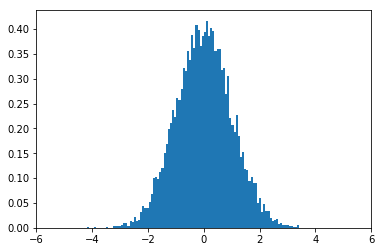

In [57]:
rv = hist(nrs, bins=100, normed=True)
xlim(-6, 6);

Por supuesto, podemos generar distribuciones bidimensionales

In [58]:
shp = (100000, 2)
mu, std = 0, 1
nrs_2d = normal(mu, std, shp)

xrs = nrs_2d[:, 0]
yrs = nrs_2d[:, 1]

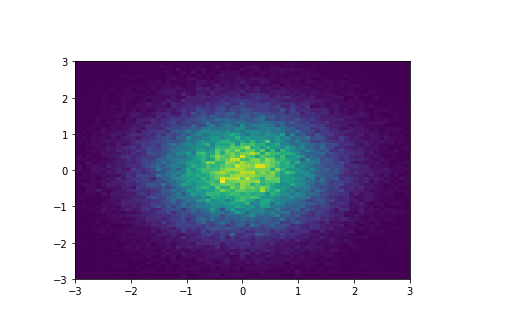

In [59]:
rv = hist2d(xrs, yrs, bins=100)
xlim(-3, 3);
ylim(-3, 3);

## Estado inicial del PRNG

La sucesión de números generados por el PRNG dependen de un valor inicial: la semilla, o ``seed``.

La semilla se especifica con le función **``seed(seed)``**, donde el argumento es una objeto de tipo 
entero o una secuencia convertible a enteros sin signo.

In [60]:
rng_seed = (5, 1, 2)
seed(rng_seed)
random_sample(20)

array([ 0.41530761,  0.92272813,  0.07070448,  0.01222466,  0.2657895 ,
        0.16089138,  0.32796653,  0.2740377 ,  0.68920743,  0.68744016,
        0.41151246,  0.14803179,  0.09796737,  0.64045132,  0.66280667,
        0.25509544,  0.76664743,  0.09704194,  0.64500184,  0.88030037])

Si se inicializa el generador con la misma semilla producirá las mismas muestras:

In [61]:
seed(rng_seed)
random_sample(20)

array([ 0.41530761,  0.92272813,  0.07070448,  0.01222466,  0.2657895 ,
        0.16089138,  0.32796653,  0.2740377 ,  0.68920743,  0.68744016,
        0.41151246,  0.14803179,  0.09796737,  0.64045132,  0.66280667,
        0.25509544,  0.76664743,  0.09704194,  0.64500184,  0.88030037])

Usar una semilla diferente, u omitirla cambia el comportamiento:

In [62]:
seed()
random_sample(20)

array([ 0.9381242 ,  0.54450389,  0.29666848,  0.00621603,  0.09498124,
        0.04727226,  0.28095841,  0.73985895,  0.15571345,  0.576711  ,
        0.83045275,  0.13112239,  0.65119525,  0.58731779,  0.56675241,
        0.64020697,  0.01023512,  0.438629  ,  0.27345077,  0.75635844])

------

## Referencias adicionales

* https://scipy.org/. Sitio oficial del proyecto Scipy
* https://docs.scipy.org/doc/scipy/reference/. Documentación oficial